## Load libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Load data

In [5]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Standardize the data

## Birth the scaler object

In [6]:
scaler = StandardScaler()

## convert (scale) the data

In [7]:
X_scaled = scaler.fit_transform(X)

## Do the actual PCA.

### Birth the PCA machine (object)

In [8]:
pca = PCA()

### Do the PCA. This is really two steps:

- compute the eigenvectors and eigenvalues (the new coordinate system) from the data
- tranform the data values into the new coordinate system

In [9]:
X_pca = pca.fit_transform(X_scaled)

(could be done in two explicit steps using `.fit` and then `.transform`, but we almost always do both steps, `.fit_transform` is provided as a wrapper)

## Now the fun part - plotting!

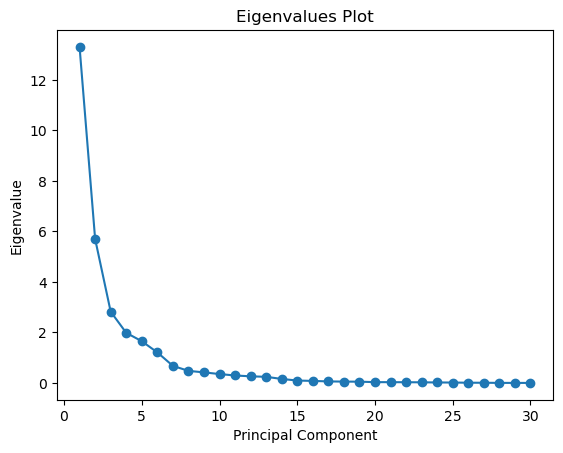

In [11]:
# Plot the eigenvalues
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues Plot')
plt.show()

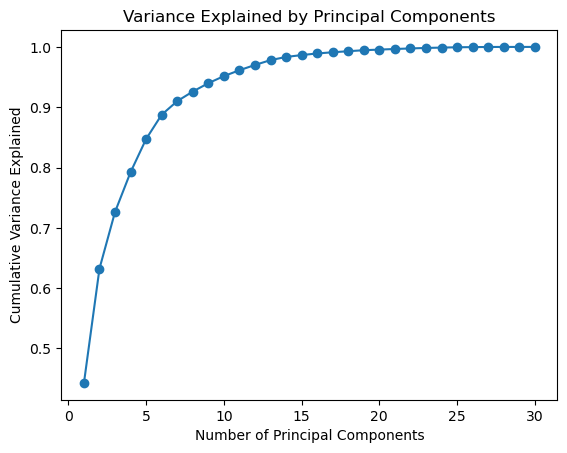

In [12]:
# Plot the variance explained by the principal components
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.show()

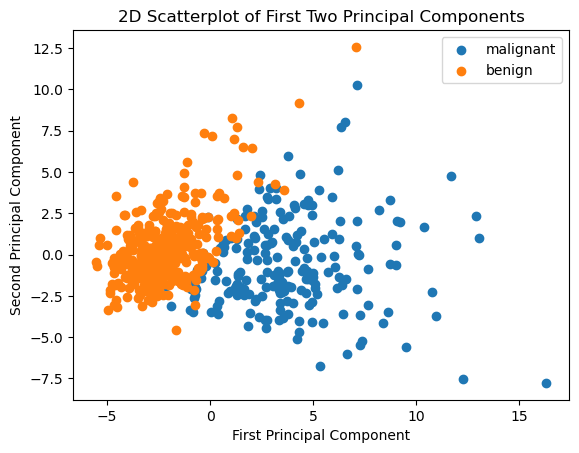

In [13]:
# Scatterplot of the first two principal components labeled by tumor type
plt.figure()
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('2D Scatterplot of First Two Principal Components')
plt.show()

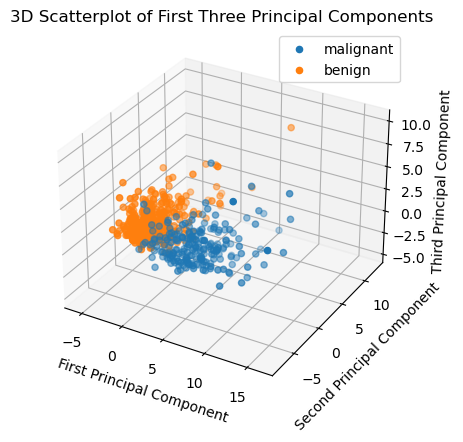

In [14]:
# 3D plot of the first three principal components labeled by tumor type
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i, target_name in enumerate(data.target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], label=target_name)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.legend()
plt.title('3D Scatterplot of First Three Principal Components')
plt.show()
